# Homework 4

Author: Sherry

# Exercise 1

## E1 (b) Compute Rt, Lt and plot them. 

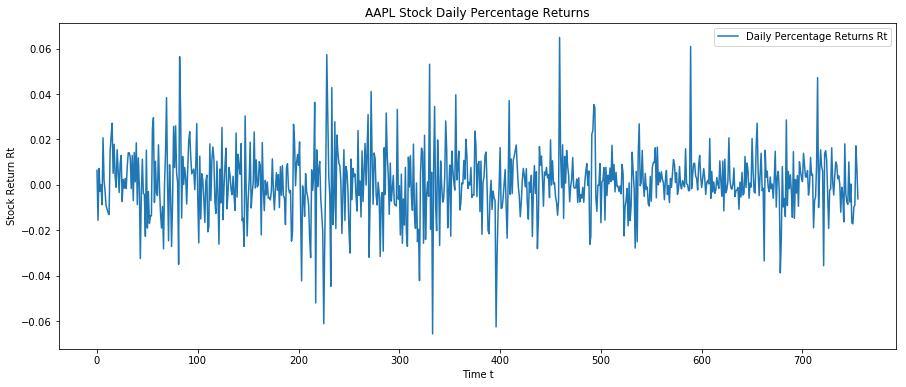

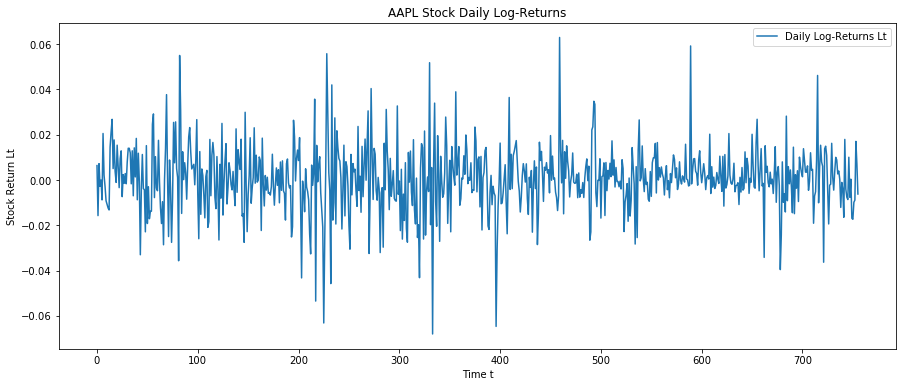

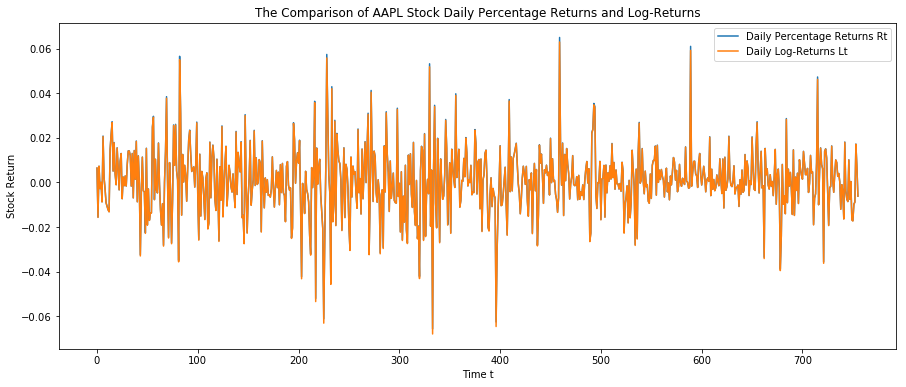

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

AAPL_price=np.genfromtxt("AAPL.csv",delimiter=",")
AAPL_close_price=AAPL_price[1:,4]

# Compute Rt
i=1
R=[]
while i<=len(AAPL_close_price)-1:
    r=(AAPL_close_price[i]-AAPL_close_price[i-1])/AAPL_close_price[i-1]
    R.append(r)
    i=i+1

# Compute Lt
j=1
L=[]
while j<=len(AAPL_close_price)-1:
    l=math.log(AAPL_close_price[j]/AAPL_close_price[j-1])
    L.append(l)
    j=j+1

# Plot Rt and Lt
y=R
y1=L
x=range(0,len(R))

plt.figure(figsize=(15, 6))
plt.plot(x, y, label=u'Daily Percentage Returns Rt')
plt.legend()
plt.xlabel('Time t')
plt.ylabel('Stock Return Rt')
plt.title('AAPL Stock Daily Percentage Returns')
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(x, y1, label=u'Daily Log-Returns Lt')
plt.legend()
plt.xlabel('Time t')
plt.ylabel('Stock Return Lt')
plt.title('AAPL Stock Daily Log-Returns')
plt.show()


plt.figure(figsize=(15, 6))
plt.plot(x, y, label=u'Daily Percentage Returns Rt')
plt.plot(x, y1, label=u'Daily Log-Returns Lt')
plt.legend()
plt.xlabel('Time t')
plt.ylabel('Stock Return')
plt.title('The Comparison of AAPL Stock Daily Percentage Returns and Log-Returns')
plt.show()
    

Explain:

From the figures, we find that the daily percentage returns and daily log-returns are similar.

## E1 (c) Plot the autocorrelations as a function of τ for R, L.

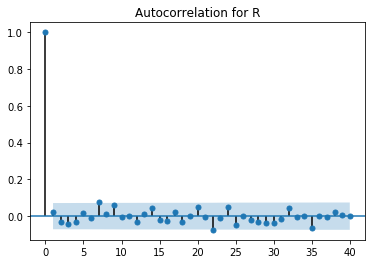

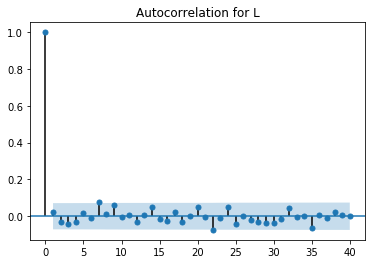

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd
series1=pd.Series(R)
series2=pd.Series(L)
plot_acf(series1,lags=40,title='Autocorrelation for R')
plt.show()
plot_acf(series2,lags=40,title='Autocorrelation for L')
plt.show()


## E1 (d) Use the Ljung-Box Q-test to decide whether the time series exhibits some correlation.

We first perfrom the Ljung-Box Q-test for R:

In [4]:
import statsmodels.api as sm
r,q,p = sm.tsa.acf(R, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.023311   0.412458  0.520724
2.0  -0.033565   1.268670  0.530288
3.0  -0.041392   2.572502  0.462331
4.0  -0.031635   3.335117  0.503388
5.0   0.016661   3.546932  0.616298
6.0  -0.008224   3.598609  0.730807
7.0   0.075466   7.955845  0.336504
8.0   0.010074   8.033597  0.430195
9.0   0.062141  10.995845  0.275994
10.0 -0.003751  11.006656  0.357000
11.0  0.003158  11.014328  0.442064
12.0 -0.029651  11.691488  0.470764
13.0  0.009409  11.759767  0.547435
14.0  0.046660  13.441165  0.492117
15.0 -0.018585  13.708282  0.547759
16.0 -0.028293  14.328177  0.574280
17.0  0.022550  14.722505  0.615462
18.0 -0.031858  15.510574  0.626663
19.0 -0.000073  15.510578  0.689641
20.0  0.048074  17.309981  0.632763
21.0 -0.005736  17.335631  0.690571
22.0 -0.074852  21.709836  0.477318
23.0 -0.008879  21.771472  0.534082
24.0  0.047444  23.533605  0.488510
25.0 -0.046333  25.216476  0.450296
26.0 -0.000743  25.216909  0

Explain: 

The hypotheses are: 

\begin{equation}
\begin{aligned}
&H_{0}: \rho_{1} =\rho_{2}=…=\rho_{40}=0   \\
&H_{1}: \rho_{i} \neq 0 
\end{aligned}
\end{equation}

We have shown the LB Q-test statistics with lags from 1 to 40. We find that when lag=40, the Q statistic 33.726856 is smaller than q(1 – α, 40) = 55.76. So we do not reject the null hypothesis that there is zero correlation at 95% confidence level. Therefore, we conclude that the time series R have no correlation, and the autocorrelation is not significant at 5% significance level.

Then we perform the Ljung-Box Q-test for L:

In [5]:
r1,q1,p1 = sm.tsa.acf(L, qstat=True)
data = np.c_[range(1,41), r1[1:], q1, p1]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.024096   0.440686  0.506792
2.0  -0.032219   1.229628  0.540741
3.0  -0.042098   2.578317  0.461304
4.0  -0.031537   3.336199  0.503217
5.0   0.015916   3.529491  0.618930
6.0  -0.007002   3.566953  0.735042
7.0   0.077959   8.216810  0.313865
8.0   0.011050   8.310348  0.403757
9.0   0.062885  11.343990  0.252865
10.0 -0.003352  11.352622  0.330713
11.0  0.004069  11.365360  0.413181
12.0 -0.029524  12.036723  0.442735
13.0  0.008955  12.098574  0.519578
14.0  0.048242  13.895937  0.457492
15.0 -0.017019  14.119930  0.516454
16.0 -0.028350  14.742314  0.543587
17.0  0.022812  15.145844  0.584977
18.0 -0.030634  15.874513  0.601305
19.0  0.000160  15.874533  0.665632
20.0  0.048573  17.711522  0.606405
21.0 -0.005528  17.735348  0.665685
22.0 -0.073944  22.004055  0.459647
23.0 -0.008005  22.054154  0.516985
24.0  0.047575  23.826053  0.471579
25.0 -0.044856  25.403351  0.439961
26.0 -0.000421  25.403490  0

Explain: 

The hypotheses are: 

\begin{equation}
\begin{aligned}
&H_{0}: \rho_{1} =\rho_{2}=…=\rho_{40}=0   \\
&H_{1}: \rho_{i} \neq 0 
\end{aligned}
\end{equation}

We have shown the LB Q-test statistics with lags from 1 to 40. We find that when lag=40, the Q statistic 33.949423 is smaller than q(1 – α, 40) = 55.76. So we do not reject the null hypothesis that there is zero correlation at 95% confidence level. Therefore, we conclude that the time series L have no correlation, and the autocorrelation is not significant at 5% significance level.

## E1 (e) Do the same for the autocorrelations of the datasets R2, L2 (square the returns first, then apply the same analysis)

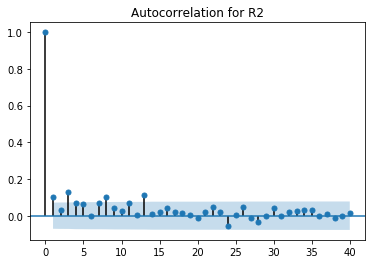

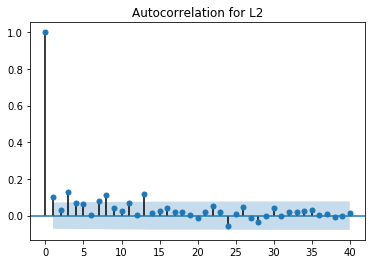

In [6]:
# Square the returns
R2=[]
for item in R:
    R2.append(item*item)

L2=[]
for item in L:
    L2.append(item*item)

# Plot the autocorrelations as a function of τ for R2, L2.
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

series3=pd.Series(R2)
series4=pd.Series(L2)
plot_acf(series3,lags=40,title='Autocorrelation for R2')
plt.show()
plot_acf(series4,lags=40,title='Autocorrelation for L2')
plt.show()

Now we use the Ljung-Box Q-test to decide whether R2, L2 exhibit some correlation.

We perfrom the test for R2 first:

In [7]:
import statsmodels.api as sm
r2,q2,p2 = sm.tsa.acf(R2, qstat=True)
data = np.c_[range(1,41), r2[1:], q2, p2]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.103257   8.092572  4.444704e-03
2.0   0.029950   8.774318  1.243601e-02
3.0   0.131534  21.940817  6.710711e-05
4.0   0.070654  25.744903  3.562202e-05
5.0   0.064800  28.949003  2.372788e-05
6.0   0.000797  28.949488  6.219068e-05
7.0   0.069630  32.658829  3.064519e-05
8.0   0.102654  40.731979  2.339452e-06
9.0   0.040421  41.985386  3.306827e-06
10.0  0.027147  42.551490  5.980329e-06
11.0  0.067020  46.006475  3.224852e-06
12.0  0.003316  46.014946  6.897308e-06
13.0  0.113019  55.866440  2.845473e-07
14.0  0.008456  55.921663  6.008786e-07
15.0  0.022116  56.299912  1.078299e-06
16.0  0.041454  57.630671  1.305425e-06
17.0  0.019283  57.919013  2.307638e-06
18.0  0.015856  58.114226  4.112196e-06
19.0  0.002200  58.117990  7.650726e-06
20.0 -0.013840  58.267133  1.316026e-05
21.0  0.018107  58.522752  2.131504e-05
22.0  0.049161  60.409578  1.943416e-05
23.0  0.020302  60.731813  2.992513e-05


Explain:

The hypotheses are: 

\begin{equation}
\begin{aligned}
&H_{0}: \rho_{1} =\rho_{2}=…=\rho_{40}=0   \\
&H_{1}: \rho_{i} \neq 0 
\end{aligned}
\end{equation}

We have shown the LB Q-test statistics with lags from 1 to 40. We find that when the lag = 40, the Q statistic 70.366909 is larger than q(1 – α, 40) = 55.76. So we reject the null hypothesis that there is zero correlation at 95% confidence level. Therefore, we conclude that the autocorrelation of R2 is significant for some lag at 5% significance level. Actually, the p-value for lags from 1 to 40 are all smaller than 0.05, which indicates that there is significant autocorrelation.

Then we perfrom the test for L2:

In [8]:
r3,q3,p3 = sm.tsa.acf(L2, qstat=True)
data = np.c_[range(1,41), r3[1:], q3, p3]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.103734   8.167378  4.265053e-03
2.0   0.032087   8.949846  1.139110e-02
3.0   0.131189  22.047343  6.376813e-05
4.0   0.070298  25.813107  3.451235e-05
5.0   0.060919  28.644855  2.721971e-05
6.0   0.001415  28.646385  7.096281e-05
7.0   0.077812  33.278753  2.349089e-05
8.0   0.110437  42.622431  1.034576e-06
9.0   0.042515  44.009016  1.406043e-06
10.0  0.025710  44.516794  2.657576e-06
11.0  0.068904  48.168720  1.332094e-06
12.0  0.002556  48.173751  2.915362e-06
13.0  0.118639  59.029415  7.829206e-08
14.0  0.014133  59.183675  1.630428e-07
15.0  0.027992  59.789618  2.741017e-07
16.0  0.040333  61.049359  3.480197e-07
17.0  0.018878  61.325703  6.339593e-07
18.0  0.017912  61.574839  1.135932e-06
19.0  0.003925  61.586815  2.165406e-06
20.0 -0.011545  61.690583  3.886603e-06
21.0  0.017615  61.932504  6.484361e-06
22.0  0.052441  64.079491  5.457869e-06
23.0  0.021645  64.445749  8.486389e-06


Explain:

The hypotheses are: 

\begin{equation}
\begin{aligned}
&H_{0}: \rho_{1} =\rho_{2}=…=\rho_{40}=0   \\
&H_{1}: \rho_{i} \neq 0 
\end{aligned}
\end{equation}

We have shown the LB Q-test statistics with lags from 1 to 40. We find that when the lag = 40, the Q statistic 73.662243 is larger than q(1 – α, 40) = 55.76. So we reject the null hypothesis that there is zero correlation at 95% confidence level. Therefore, we conclude that the autocorrelation of L2 is significant for some lag at 5% significance level. Actually, the p-value for lags from 1 to 40 are all smaller than 0.05, which indicates that there is significant autocorrelation.
